### Machine Learning for Physical Sciences
*pip install mlphys*

Author: Sanjaya Lohani

*Please report bugs at slohani@mlphys.com

Papers:

1.   Lohani, S., Lukens, J.M., Jones, D.E., Searles, T.A., Glasser, R.T. and Kirby, B.T., 2021. Improving application performance with biased distributions of quantum states. *Physical Review Research*, 3(4), p.043145. 

2.  Lohani, S., Searles, T. A., Kirby, B. T., & Glasser, R. T. (2021). On the Experimental Feasibility of Quantum State Reconstruction via Machine Learning. *IEEE Transactions on Quantum Engineering*, 2, 1–10. 

Collaborator: Joseph M. Lukens, Daniel E. Jones, Ryan T. Glasser, Thomas A. Searles, and Brian T. Kirby








In [ ]:
!pip install mlphys

In [ ]:
import deepqis.Simulator.Distributions as dist
import deepqis.Simulator.Measurements as meas
import matplotlib.pyplot as plt
import deepqis.utils.Alpha_Measure as find_alpha
import deepqis.utils.Concurrence_Measure as find_con
import deepqis.utils.Purity_Measure as find_pm

#1. Mai-Alquier (MA) distributions
$\text{Dir}(x\vert\alpha)=\frac{\Gamma\left(\sum_{j=1}^{K}\alpha_{j}\right)}{\prod_{j=1}^{K}\Gamma(\alpha_{j})}\prod_{j=1}^{K}x_{j}^{\alpha_{j}-1}$,

$\rho=\sum_{j=1}^{K}x_{j}\vert\psi_{j}\rangle\langle\psi_{j}\vert$.

### 1. 1. Symmetric MA distributions

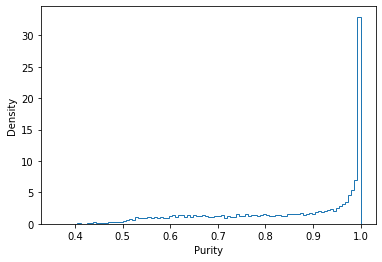

In [ ]:
alpha_value = 0.1 # say

# generating Symmetirc MA distributions (10_000 states)
density_matrix_ma = dist.MaiAlquierDist_Symmetric(qs=2, alpha=alpha_value).sample_dm(n_size=10000)

# Finding purity for generated states
pur_dist = find_pm.purity(density_matrix_ma)

# visualizing the purity distributions
plt.hist(pur_dist, bins=100, histtype='step', density=True)
plt.xlabel('Purity')
plt.ylabel('Density')
plt.show()

### 1. 1. 2 Asymmetric MA distributions

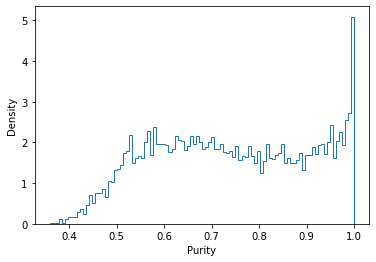

In [ ]:

alpha_vec = [0.1, 0.2, 0.3, 0.4] # say
density_matrix_ma_asym = dist.MaiAlquierDist_Asymmetric(qs=2, alpha=alpha_vec).sample_dm(n_size=10000)
pur_dist_asym = find_pm.purity(density_matrix_ma_asym)
plt.hist(pur_dist_asym, bins=100, histtype='step', density=True)
plt.xlabel('Purity')
plt.ylabel('Density')
plt.show()


#2. Hilbert-Schmidt (HS) distributions
$\rho=\frac{GG^{\dagger}}{\text{Tr}\left(GG^{\dagger} \right)}$

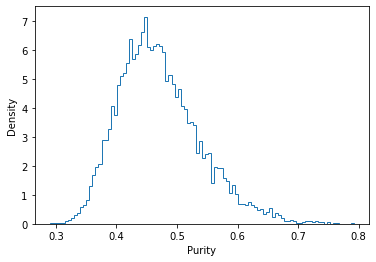

(10000, 4, 4)


In [ ]:
# Generating 10_000 Hilbert_Schmidt states (eg. 2 qubits)
dm_hs = dist.Hilbert_Schmidt(qs=2).sample_dm(n_size=10000)

pur_hs = find_pm.purity(dm_hs)
plt.hist(pur_hs, bins=100, histtype='step', density=True)
plt.xlabel('Purity')
plt.ylabel('Density')
plt.show()
print(dm_hs.shape)

#### $MA_{\alpha=D=K}$ vs HS (eg, two, three and four qubits cases):

Please see Fig. 3 in the Paper (1) above for more details.

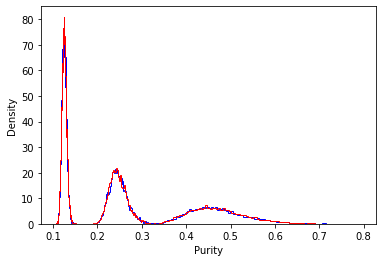

In [ ]:
import tensorflow as tf
# MA: red line
# HS: blue line

ma_pur_list = []
hs_pur_list = []
for qubits in [2, 3, 4]:
  qubits_tensor = tf.constant(qubits)
  alpha_value = tf.cast(2**qubits_tensor, tf.float32)
  # MA at alpha = D = K = 2**Q; Q = number of qubits
  ma_gen = dist.MaiAlquierDist_Symmetric(qs=qubits, alpha=alpha_value).sample_dm(n_size=10000)
  ma_pur = find_pm.purity(ma_gen)
  ma_pur_list.append(ma_pur)

  # HS at alpha = D = K = 2**Q; Q = number of qubits
  hs_gen = dist.Hilbert_Schmidt(qs=qubits).sample_dm(n_size=10000)
  hs_pur = find_pm.purity(hs_gen)
  hs_pur_list.append(hs_pur)

for i in range(3):
  plt.hist(hs_pur_list[i],bins=100, histtype='step', density=True, color='b')
  plt.hist(ma_pur_list[i],bins=100, histtype='step', density=True, color='r')
plt.xlabel('Purity')
plt.ylabel('Density')
plt.show()

#3. Bures distributions

$\rho=\frac{\left({1}+U\right)GG^{\dagger}\left({1}+U^{\dagger}\right)}{\text{Tr}\left[\left({1}+U\right)GG^{\dagger}\left({1}+U^{\dagger}\right)\right]}$

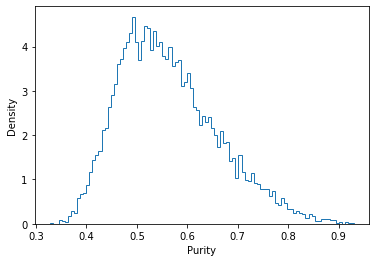

In [ ]:
# Generating 10_000 Bures states
bures = dist.Bures(qs=2).sample_dm(n_size=10000)

pur_bures = find_pm.purity(bures)
plt.hist(pur_bures, bins=100, histtype='step', density=True)
plt.xlabel('Purity')
plt.ylabel('Density')
plt.show()

# 4. Haar-random Pure States

In [ ]:
# Generating 10_000 Haar random pure states
haar = dist.Haar_State(qs=2).sample_dm(n_size=10_000)

pur_haar = find_pm.purity(haar)
print(pur_haar)


[1. 1. 1. ... 1. 1. 1.]
